# Exploration of SIT distribution (Task 2.2 ?)

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import datetime

import matplotlib.pyplot as plt
from src.utils import save_name
from src.utils import modif_plot

from src.data_preparation import load_data

In [2]:
import src.utils.tardisml_utils as tardisml_utils
rootdir = tardisml_utils.get_rootdir()

In [7]:
to_load = 'ml' # 'na' or 'ml' or 'ass'

In [4]:
time_period = '2011' # '2000' or '2011' or '2000-2011' 
# 2000 = FROM 2000 to 2011
# 2011 = from 2011 to 2020
# 2000-2011 = both 

In [8]:
# -----------------------------------
#         Load TOPAZ 2000-2011
# -----------------------------------

# global prediction RF:  (as example)
# filename = f'{rootdir}Leo/results/rf_221216-141433/ml/sit_ml_2011_2019.nc'

# filename = '/scratch/project_465000269/edelleo1/Leo/results/rf_221229-171734/ml/sit_ml_2000_2011.nc'
# ml_model = 'RF'

filename = '/scratch/project_465000269/edelleo1/Leo/results/lstm_230201-112355/ml/sit_gLSTM_2000_2011.nc'
# filename = '/scratch/project_465000269/edelleo1/Leo/results/lstm_230201-112355/ml/sit_gLSTM3_bk_2011_2019_01.nc'
ml_model = 'LSTM'

if to_load == 'ml':
    sit, chrono = load_data.load_nc(filename, 'sit_ml', X_only=True)
elif to_load == 'na':
    sit, chrono = load_data.load_nc(filename, 'sit_na', X_only=True)


# Cap negative value at 0 m (while keeping nan)
# sit = (sit.where((0<=sit), -999)).where(np.isfinite(sit))  # exclude open ocean (SIT=0m)
sit0_h1 = (sit.where((0<sit), -999)).where(np.isfinite(sit))

In [9]:
# -----------------------------------
#         Load TOPAZ 2011-2019
# -----------------------------------

# global prediction RF:  (as example)
# filename = f'{rootdir}Leo/results/rf_221216-141433/ml/sit_ml_2011_2019.nc'

# filename = '/scratch/project_465000269/edelleo1/Leo/results/rf_221229-171734/ml/sit_ml_2000_2011.nc'
# ml_model = 'RF'

# filename = '/scratch/project_465000269/edelleo1/Leo/results/lstm_230201-112355/ml/sit_gLSTM_2000_2011.nc'
filename = '/scratch/project_465000269/edelleo1/Leo/results/lstm_230201-112355/ml/sit_gLSTM3_bk_2011_2019_01.nc'
ml_model = ' LSTM'

if to_load == 'ml':
    sit, chrono = load_data.load_nc(filename, 'sit_ml', X_only=True)
elif to_load == 'na':
    sit, chrono = load_data.load_nc(filename, 'sit_na', X_only=True)
    ml_model = ''
elif to_load == 'ass':
    filename = '/scratch/project_465000269/edelleo1/Leo/results/pca_i100-550_j300-629/sithick_TOPAZ4b_2011_2019.nc'
    ml_model = ' + CS2SMOS'
    sit, chrono = load_data.load_nc(filename, 'sithick', X_only=True)
    

# Cap negative value at 0 m (while keeping nan)
# sit = (sit.where((0<=sit), -999)).where(np.isfinite(sit))  # exclude open ocean (SIT=0m)
sit0_h2 = (sit.where((0<sit), -999)).where(np.isfinite(sit))

In [108]:
sit0_h1 

<xarray.DataArray 'sit_ml' (time: 4383, y: 329, x: 450)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * time       (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2011-12-31
    latitude   (y, x) float32 62.74 62.83 62.92 63.01 ... 56.49 56.41 56.33
    longitude  (y, x) float32 -100.5 -100.4 -100.3 -100.1 ... 82.73 82.61 82.5
  * x          (x) float32 -25.5 -25.38 -25.25 -25.12 ... 30.25 30.38 30.5 30.62
  * y          (y) float32 -17.5 -17.38 -17.25 -17.12 ... 23.12 23.25 23.38 23.5

In [109]:
sit0_h2

<xarray.DataArray 'sit_ml' (time: 3014, y: 329, x: 450)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * time       (time) datetime64[ns] 2011-10-01 2011-10-02 ... 2019-12-31
  * x          (x) float32 -25.5 -25.38 -25.25 -25.12 ... 30.25 30.38 30.5 30.62
  * y          (y) float32 -17.5 -17.38 -17.25 -17.12 ... 23.12 23.25 23.38 23.5
    latitude   (y, x) float32 62.74 62.83 62.92 63.01 ... 56.49 56.41 56.33
    longitude  (y, x) float32 -100.5 -100.4 -100.3 -100.1 ... 82.73 82.61 82.5

In [ ]:
sit0_h2

In [10]:
# combine 2000-2011 and 2011-2019

if time_period == '2000-2011': # '2000' or '2011' or '2000-2011' 
    if to_load == 'na':
        sit0 = xr.concat([sit0_h1.isel(time=slice(0,-92)), sit0_h2], dim='time')
    elif to_load == 'ml':
        sit0 = xr.concat([sit0_h1.isel(time=slice(0,-92)), sit0_h2], dim='time')
elif time_period == '2000':
    sit0 = sit0_h1
elif time_period == '2011':
    sit0 = sit0_h2


In [11]:
sit_nan = (sit.where((0<=sit))).where(np.isfinite(sit))  # exclude open ocean (SIT=0m)
# and all values -999 are nan (for histogram fit)

In [12]:
# # need to get monthly mean
sit_mm = sit.resample(time='1M').mean()

# # change time axis to first day of each month
time_idx = sit_mm.time.to_index()
sit_mm['time'] = [datetime.datetime(t.year, t.month, 1) for t in time_idx]
chrono_mm = pd.DataFrame({'date':pd.to_datetime(sit_mm['time'].to_numpy())})

In [13]:
# histogram
bin_width = 0.1
bins = np.arange(0,8+bin_width,bin_width)

In [7]:
# remove open water fraction

In [14]:
# compute for all time steps (daily or monthly)

def compute_distri_time(sit, bins=None, bin_width=None):
    '''
    Returns distribution (pdf) of SIT over time
    
    
    Parameters:
    -----------
    
        sit           :      xarray of dimension (time, y, x)
        bins          :      array of bins. if None, will select values for thickness categories from TOPAZ5
        bin_width     :      float. If given, bins between 0 and 8 meters will be created spaced by bin_width
    '''
    
    if bins is None:
        bins = np.array([0, 0.64, 1.39, 2.47, 4.57, 20]) # from icecat TOPAZ5
    if bin_width is not None:
        bins = np.arange(0,8+bin_width,bin_width)
    
    distri = np.zeros((sit.shape[0], bins.size-1))
    
    ntime = sit.shape[0]
    
    for nt in range(ntime)[:]:
        # remove nan: from xarray.plot.hist()
        no_nan = np.ravel(sit.isel(time=nt).to_numpy())
        no_nan = no_nan[pd.notnull(no_nan)]
        
        hist, _ = np.histogram(no_nan, bins=bins) # , density=True)
        distri[nt] = hist/sum(hist)
#         distri[nt] = hist/sum(hist)
    
    
    dist = xr.DataArray(distri.T,
                        coords={'bins': bins[:-1], 'time': sit.time}, 
                        dims=["bins", "time"])
    
    return dist


In [15]:
sit_dist = compute_distri_time(sit, bin_width=0.1)

/tmp/ipykernel_7144/481705165.py:31: RuntimeWarning: invalid value encountered in true_divide
  distri[nt] = hist/sum(hist)


In [16]:
sit_dist0 = compute_distri_time(sit0, bin_width=0.1)

/tmp/ipykernel_7144/481705165.py:31: RuntimeWarning: invalid value encountered in true_divide
  distri[nt] = hist/sum(hist)


In [17]:
sit_dist0

<xarray.DataArray (bins: 80, time: 3014)>
array([[2.62524586e-01, 2.53986112e-01, 2.49126146e-01, ...,
                   nan,            nan,            nan],
       [4.89606232e-02, 4.97924506e-02, 5.37711667e-02, ...,
                   nan,            nan,            nan],
       [3.83933048e-02, 4.00356907e-02, 4.22751282e-02, ...,
                   nan,            nan,            nan],
       ...,
       [1.92834278e-05, 1.93971370e-05, 0.00000000e+00, ...,
                   nan,            nan,            nan],
       [0.00000000e+00, 0.00000000e+00, 1.94189840e-05, ...,
                   nan,            nan,            nan],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
                   nan,            nan,            nan]])
Coordinates:
  * bins     (bins) float64 0.0 0.1 0.2 0.3 0.4 0.5 ... 7.4 7.5 7.6 7.7 7.8 7.9
  * time     (time) datetime64[ns] 2011-10-01 2011-10-02 ... 2019-12-31

In [18]:
sit_dist_d = compute_distri_time(sit, bin_width=0.1)

/tmp/ipykernel_7144/481705165.py:31: RuntimeWarning: invalid value encountered in true_divide
  distri[nt] = hist/sum(hist)


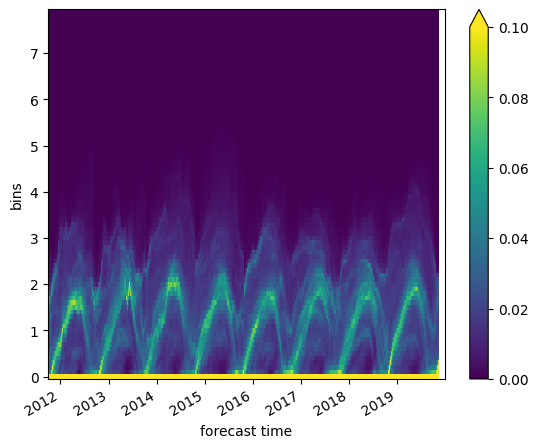

In [19]:
sit_dist.plot(vmax=0.1)  # .isel(time=slice(None,12))

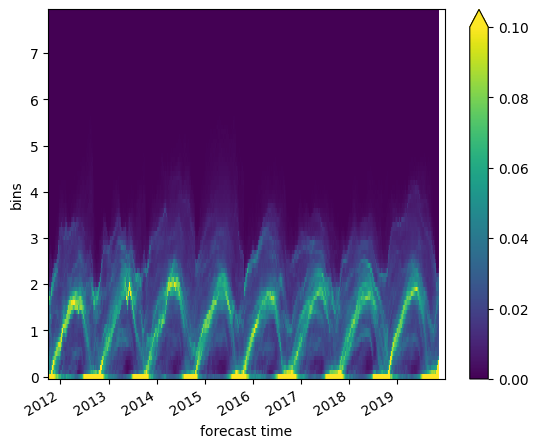

In [20]:
sit_dist0.plot(vmax=0.1)  # with open water (sit=0)

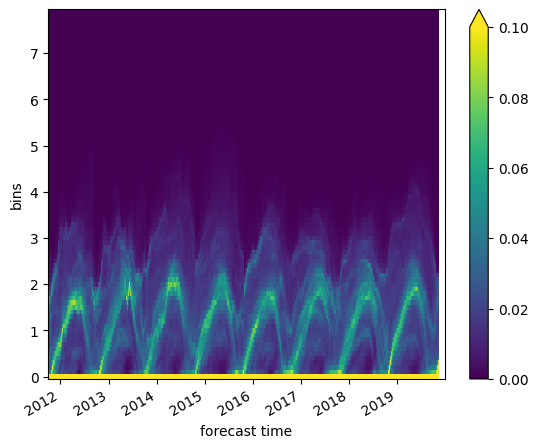

In [18]:
sit_dist_d.plot(vmax=.1)  # with open water (sit=0)

In [22]:
sit_frac = compute_distri_time(sit0)

/tmp/ipykernel_7144/481705165.py:31: RuntimeWarning: invalid value encountered in true_divide
  distri[nt] = hist/sum(hist)


------------------

In [93]:
def draw_dist_frac(dist, frac, tp_model='', savefig=False, showfig=True, rootdir=None, fig_dir=None):
    '''
    
    Parameters:
    -----------
    
        tp_model     :     string, TOPAZ version used. Ex: 4b, 4bFR, or ML-corrected: LSTM, RF, CNN
    '''
    from matplotlib.colors import LogNorm
    
    cat_TP5 = [0, 0.64, 1.39, 2.47, 4.57] # and above 4.57
    label_cat = ['< 0.64m', '< 1.39m', '< 2.47m', '< 4.57m ', '> 4.57m ']


    fig, axes = plt.subplots(nrows=2, figsize=(14,6), constrained_layout=True)

    # cut at 5m of SIT as very little to see above
    imC = dist.isel(bins=slice(None,58)).plot(ax=axes[0], vmax=.1, add_colorbar=False, 
                                              norm=LogNorm(vmin=0.01, vmax=.1)) # vmax=0.1
    axes[0].set_ylabel('SIT (m)')
    axes[0].set_xlabel('')
    axes[0].grid(axis='y',color='white', alpha=0.6, ls =':')
    
    for n in range(len(cat_TP5)):
        frac.isel(bins=slice(None,n+1)).sum(dim='bins').plot(ax=axes[1], label=label_cat[n])
    
    axes[1].axhline(y=0, ls='--', color='grey', alpha=0.6)
    
    plt.legend(ncol=5, loc='lower center')
    axes[1].set_ylabel('Fraction of sea ice')
    axes[1].set_xlabel('')    
    axes[1].set_xlim([frac.time[0],frac.time[-1]])
    axes[1].set_ylim([-0.2, 1.05])
    axes[1].set_yticklabels(['','0','0.2','0.4','0.6','0.8','1'])
    
    cb = fig.colorbar(imC, ax=axes[0], label='Frequency', extend='max', shrink=0.3, location="top")
    cb.ax.minorticks_off()
#     axes[0].minorticks_off()
    
    fig.suptitle(f'TOPAZ{tp_model}', y=0.)
    
    modif_plot.resize(fig, s=14)
        
    if savefig:
        strdate = f'{str(sit_frac.time[0].data)[:4]}_{str(sit_frac.time[-1].data)[:4]}'
        filename = f'SIT_distri_fraction_TOPAZ{tp_model}_{strdate}.png'
        plt.savefig(f"{rootdir}{fig_dir}{filename}", bbox_inches='tight')
        print(f'Saved as: {rootdir}{fig_dir}{filename}')
        
    if showfig:
        plt.show()
    
    plt.close()

In [24]:
def draw_bias_dist(dist, title='', savefig=False, showfig=True, rootdir=None, fig_dir=None, namefig=''):
    '''
    
    Parameters:
    -----------
    
        tp_model     :     string, TOPAZ version used. Ex: 4b, 4bFR, or ML-corrected: LSTM, RF, CNN
    '''
    
    fig, ax = plt.subplots(nrows=1, figsize=(14,4), constrained_layout=True)

    # cut at 5m of SIT as very little to see above
    imC = dist.isel(bins=slice(None,58)).plot(ax=ax, vmin=-0.15, vmax=0.15, add_colorbar=False, cmap = plt.get_cmap('bwr_r')) # vmax=0.1
    ax.set_ylabel('SIT (m)')
    ax.set_xlabel('')
    ax.grid(axis='y',color='white', alpha=0.6, ls =':')
    
    fig.colorbar(imC, ax=ax, label='Frequency bias', extend='max', shrink=0.3, location="bottom")
    fig.suptitle(f'{title}') # , y=0.)
    
    modif_plot.resize(fig, s=14)
        
    if savefig:
        strdate = f'{str(sit_frac.time[0].data)[:4]}_{str(sit_frac.time[-1].data)[:4]}'
        filename = f'SIT_distri_fraction_bias_{namefig}_{strdate}.png'
        plt.savefig(f"{rootdir}{fig_dir}{filename}", bbox_inches='tight')
        print(f'Saved as: {rootdir}{fig_dir}{filename}')
        
    if showfig:
        plt.show()
    
    plt.close()

In [25]:
fig_dir = 'Leo/results/distribution_SIT/'

In [137]:
sd_lstm = sit_dist0

In [143]:
sd_ass = sit_dist0

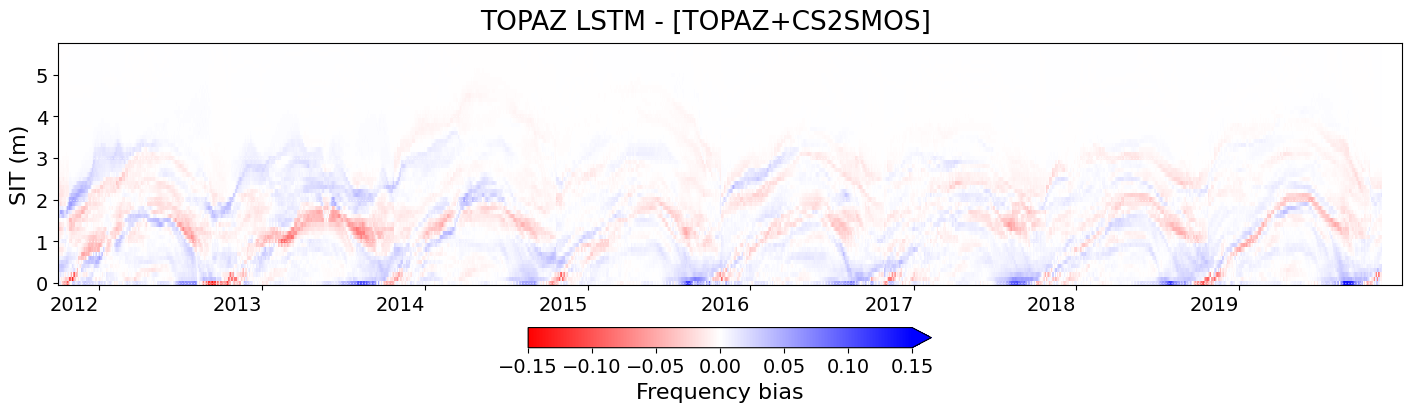

In [155]:
draw_bias_dist(sd_lstm - sd_ass, title='TOPAZ LSTM - [TOPAZ+CS2SMOS]',
                savefig=False, rootdir=rootdir, fig_dir=fig_dir)

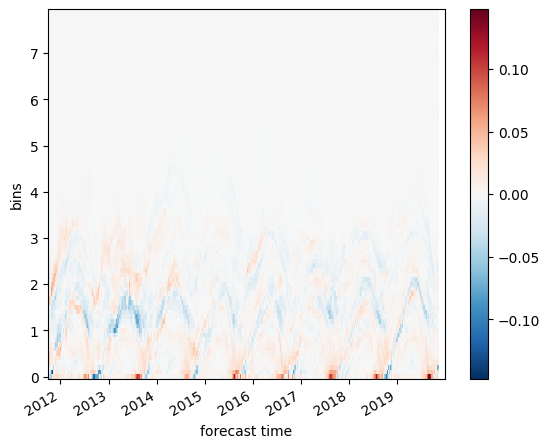

In [145]:
(sd_lstm - sd_ass).plot()

/tmp/ipykernel_7144/1986551167.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_yticklabels(['','0','0.2','0.4','0.6','0.8','1'])


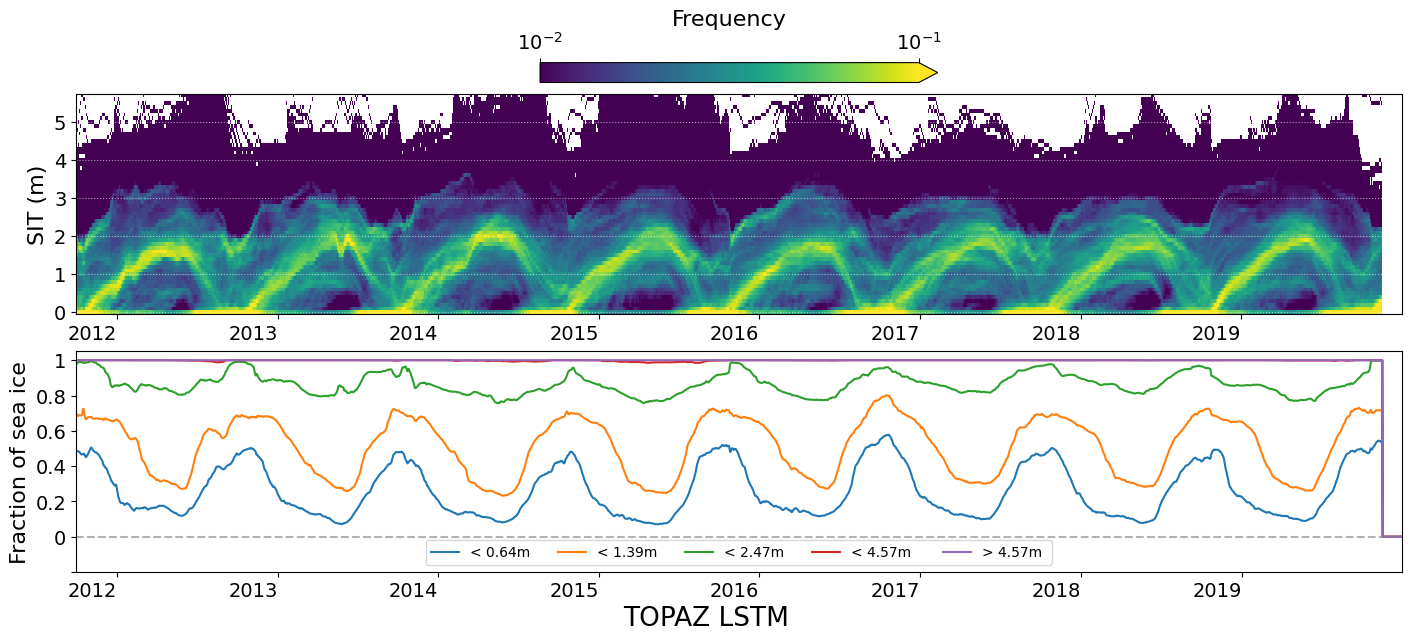

In [94]:
draw_dist_frac(sit_dist0, sit_frac, tp_model=ml_model,
                savefig=False, rootdir=rootdir, fig_dir=fig_dir)

/tmp/ipykernel_76923/1309858364.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_yticklabels(['','0','0.2','0.4','0.6','0.8','1'])


Saved as: /scratch/project_465000269/edelleo1/Leo/results/distribution_SIT/SIT_distri_fraction_TOPAZ LSTM_2000_2019.png


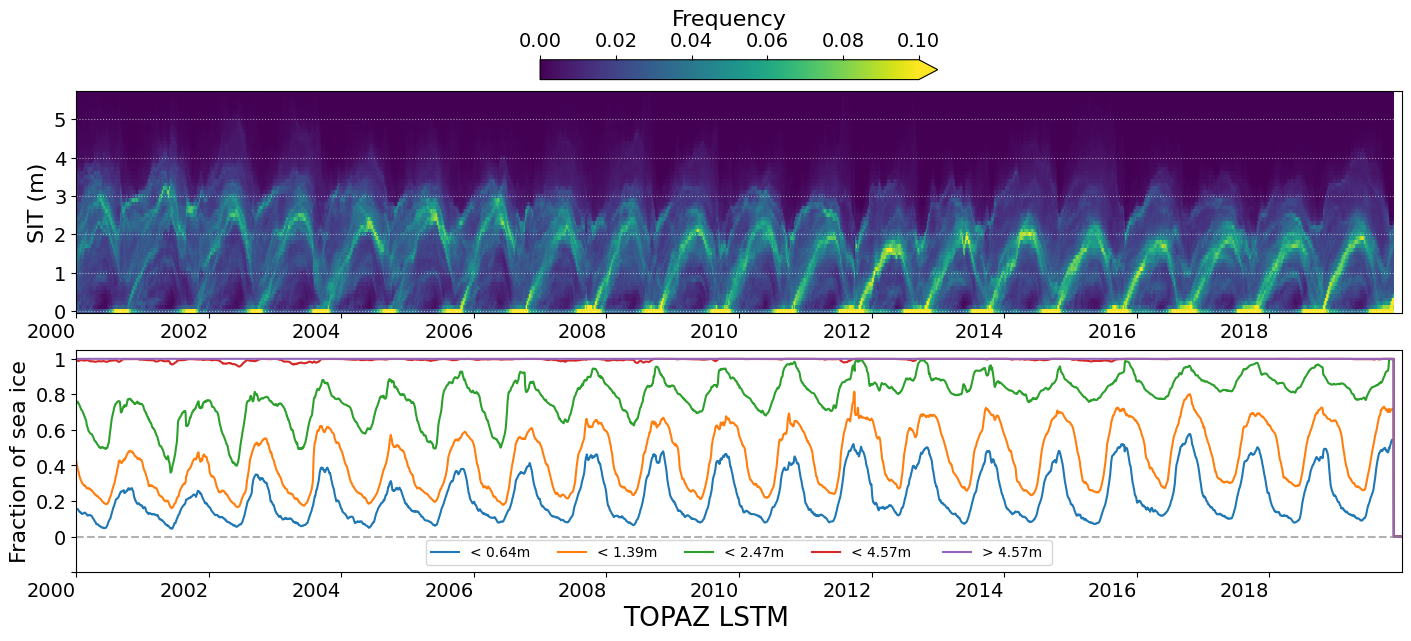

In [123]:
draw_dist_frac(sit_dist0, sit_frac, tp_model=' LSTM',
                 savefig=True, rootdir=rootdir, fig_dir=fig_dir)

------------------

In [228]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

''' from https://stackoverflow.com/questions/42163438/fitting-binned-lognormal-data-in-python
'''

def pdf(x, mu, sigma):
    """pdf of lognormal distribution"""

    return (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2)) / (x * sigma * np.sqrt(2 * np.pi)))




def draw_hist_fitted(sit, bins, chrono, day, bins_cut=None,  tp_model='', savefig=False, showfig=True, rootdir=None, fig_dir=None):
    '''
    
    Parameters:
    -----------
    
        sit         :    xr array of SIT, dimension (time, y, x)
        bins        :    bins for histogram
        bins_cut    :    bins used for fitting curve
        tp_model     :     string, TOPAZ version used. Ex: 4b, 4bFR, or ML-corrected: LSTM, RF, CNN
    
    '''
    
    # identify index to plot
    chrono_dt = np.array([dt.date() for dt in chrono.date])
    # chrono_dt = np.array([dt.date() for dt in chrono])
    idx = np.where(chrono_dt==day.date())[0]
    
    if len(idx) < 1:
        print('Day not found')
        return
    
    # data without nan
    no_nan = np.ravel(sit.isel(time=idx).to_numpy())
    no_nan = no_nan[pd.notnull(no_nan)]

    # cut off first bin (containing SIT=0)
    if bins_cut is None:
        bins_cut = bins[1:]  # 1:

    # get histo to plot (include SIT=0)
    res_tmp = np.histogram(no_nan, bins=bins)
    hist_plot = res_tmp[0]/sum(res_tmp[0])
    plt.close()

    # get distribution to fit (exclude SIT=0)
    res = np.histogram(no_nan, bins=bins_cut) # , density=True)       
    hist = res[0]/sum(res[0])
    plt.close()  # because plt.hist() create a plot

    # Lognormal fit (factor 10 is used because values are too small for fitting close to 0)
    mu, sigma = 3., 1.                              # actual parameter value
    y = hist *10  # res[0]  # hist                                        # frequencies for each bin, this is y value to fit 
    xs = res[1]                                      # boundaries for each bin
    delta = xs[1] - xs[0]                           # width of bins
    x = xs[:-1] + delta                           # midpoints of bins, this is x value to fit

    popt, pcov = curve_fit(pdf, x, y, p0=[1, 1])    # data fitting, popt contains the fitted parameters
    # print(popt)

    # plot
    fig, ax = plt.subplots(constrained_layout=True)
    # ax.hist(no_nan, bins=bins, density=True, align='mid', label='Histogram')
    # ax.bar(hist, bins=bins, density=False, align='mid', label='Histogram')
    # plt.plot(bins_cut[:-1], hist, label='Histogram')
    plt.plot(bins[:-1], hist_plot, label='Distribution')


    x_new = np.linspace(min(xs), max(xs), 10000)
    yf = pdf(x_new, *popt)
    ax.plot(x_new, yf/10, linestyle = 'dashed', label="Fitted")

    ax.set_xlim([0, 8])
    ax.set_ylim([0, .1])
    ax.set_ylabel('Frequency')
    ax.set_xlabel('SIT (m)')


    ax.legend()
#     plt.title(f'{str(sit_nan.isel(time=idx).time.to_numpy())[:10]}')
    plt.title(f'{chrono.iloc[idx[0]].date.strftime("%Y %m %d")}')

    
    if savefig:
        sdate = chrono_dt[idx][0].strftime("%Y%m%d")
        filename = f'SIT_distri_TOPAZ{tp_model}_{sdate}.png'
        plt.savefig(f"{rootdir}{fig_dir}{filename}", bbox_inches='tight')
        print(f'Saved as: {rootdir}{fig_dir}{filename}')
        
    if showfig:
        plt.show()
    
    plt.close()
    

In [249]:
def draw_hist_fitted_all(sit, bins, chrono, days, rootdir, fig_dir, bins_cut=None,  tp_model=''):
    '''Loop draw_hist_fitted()
    '''

    for day in days:
        draw_hist_fitted(sit, bins, chrono, day, bins_cut=bins_cut, tp_model=tp_model, savefig=True, showfig=False, 
                         rootdir=rootdir, fig_dir=fig_dir)

Saved as: /scratch/project_465000269/edelleo1/Leo/results/distribution_SIT/SIT_distri_TOPAZ_20000101.png


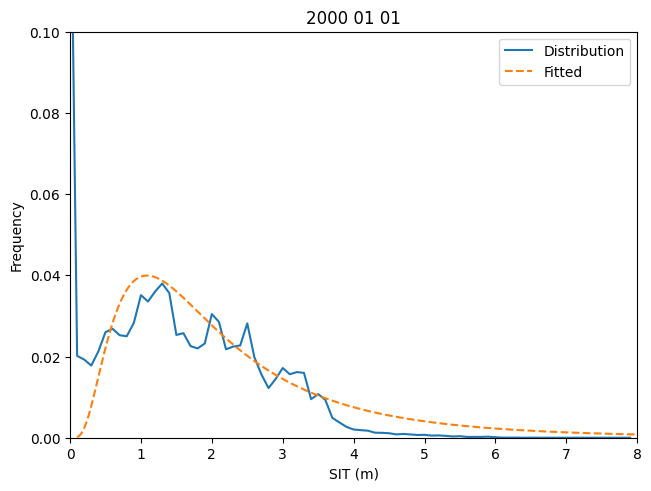

In [234]:
bins_cut = bins[1:]
day = datetime.datetime(2000,1,1)

draw_hist_fitted(sit_nan, bins=bins, bins_cut=bins_cut, chrono=chrono, day=day,
                savefig=True, rootdir=rootdir, fig_dir=fig_dir)

In [258]:
d1 = datetime.datetime(2000,1,1)
d2 = datetime.datetime(2011,12,31)
# all_days = np.array([d1 + datetime.timedelta(days=x) for x in range((d2-d1).days + 1)])
all_days = np.array([d1 + datetime.timedelta(days=x) for x in range(0, (d2-d1).days + 1, 15)])  # bimonthly

In [260]:
draw_hist_fitted_all(sit_nan, bins=bins, bins_cut=bins_cut, chrono=chrono, days=all_days,
                rootdir=rootdir, fig_dir=fig_dir)

Saved as: /scratch/project_465000269/edelleo1/Leo/results/distribution_SIT/SIT_distri_TOPAZ_20000101.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/distribution_SIT/SIT_distri_TOPAZ_20000116.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/distribution_SIT/SIT_distri_TOPAZ_20000131.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/distribution_SIT/SIT_distri_TOPAZ_20000215.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/distribution_SIT/SIT_distri_TOPAZ_20000301.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/distribution_SIT/SIT_distri_TOPAZ_20000316.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/distribution_SIT/SIT_distri_TOPAZ_20000331.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/distribution_SIT/SIT_distri_TOPAZ_20000415.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/distribution_SIT/SIT_distri_TOPAZ_20000430.png
Saved as: /scratch/project_465000269/edelleo1/Leo/resul

Saved as: /scratch/project_465000269/edelleo1/Leo/results/distribution_SIT/SIT_distri_TOPAZ_20030331.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/distribution_SIT/SIT_distri_TOPAZ_20030415.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/distribution_SIT/SIT_distri_TOPAZ_20030430.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/distribution_SIT/SIT_distri_TOPAZ_20030515.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/distribution_SIT/SIT_distri_TOPAZ_20030530.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/distribution_SIT/SIT_distri_TOPAZ_20030614.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/distribution_SIT/SIT_distri_TOPAZ_20030629.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/distribution_SIT/SIT_distri_TOPAZ_20030714.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/distribution_SIT/SIT_distri_TOPAZ_20030729.png
Saved as: /scratch/project_465000269/edelleo1/Leo/resul

Saved as: /scratch/project_465000269/edelleo1/Leo/results/distribution_SIT/SIT_distri_TOPAZ_20060628.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/distribution_SIT/SIT_distri_TOPAZ_20060713.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/distribution_SIT/SIT_distri_TOPAZ_20060728.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/distribution_SIT/SIT_distri_TOPAZ_20060812.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/distribution_SIT/SIT_distri_TOPAZ_20060827.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/distribution_SIT/SIT_distri_TOPAZ_20060911.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/distribution_SIT/SIT_distri_TOPAZ_20060926.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/distribution_SIT/SIT_distri_TOPAZ_20061011.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/distribution_SIT/SIT_distri_TOPAZ_20061026.png
Saved as: /scratch/project_465000269/edelleo1/Leo/resul

Saved as: /scratch/project_465000269/edelleo1/Leo/results/distribution_SIT/SIT_distri_TOPAZ_20090925.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/distribution_SIT/SIT_distri_TOPAZ_20091010.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/distribution_SIT/SIT_distri_TOPAZ_20091025.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/distribution_SIT/SIT_distri_TOPAZ_20091109.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/distribution_SIT/SIT_distri_TOPAZ_20091124.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/distribution_SIT/SIT_distri_TOPAZ_20091209.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/distribution_SIT/SIT_distri_TOPAZ_20091224.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/distribution_SIT/SIT_distri_TOPAZ_20100108.png
Saved as: /scratch/project_465000269/edelleo1/Leo/results/distribution_SIT/SIT_distri_TOPAZ_20100123.png
Saved as: /scratch/project_465000269/edelleo1/Leo/resul

/tmp/ipykernel_170468/1043776150.py:51: RuntimeWarning: invalid value encountered in true_divide
  hist_plot = res_tmp[0]/sum(res_tmp[0])
/tmp/ipykernel_170468/1043776150.py:56: RuntimeWarning: invalid value encountered in true_divide
  hist = res[0]/sum(res[0])


ValueError: array must not contain infs or NaNs

----------------

Draft

In [232]:
# res = sit_mm.isel(time=12).plot.hist(bins=bins)

# pdf = res[0]/sum(res[0])

# plt.plot(pdf)
# plt.ylim([0,0.1])
# plt.xlim([0,80])
# plt.gca().set_xticklabels(range(9))
# plt.xlabel('SIT (m)')
# plt.ylabel('Frequency');